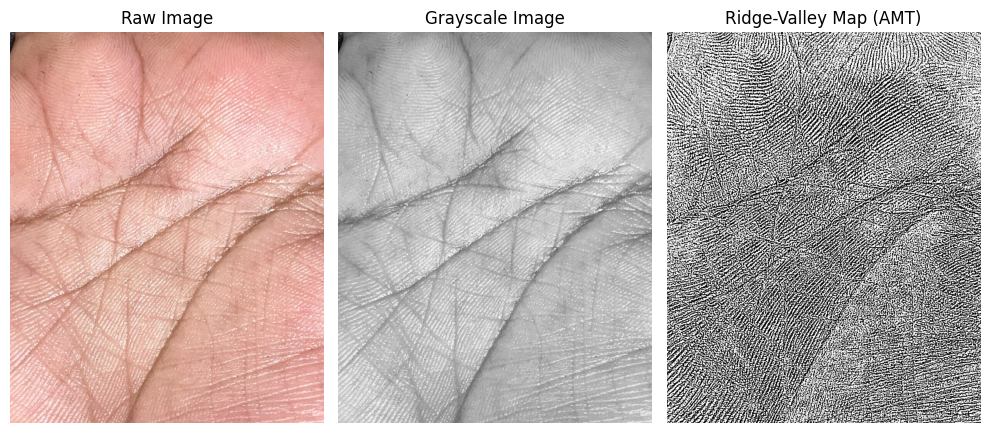

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input fingerprint image
image_path = "/content/drive/MyDrive/Fingerprint palmprint fusion/IMG_1723_1.JPG"  # Replace with the path to your fingerprint image
raw_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Mean Thresholding
amt_image = cv2.adaptiveThreshold(
    gray_image,  # Input grayscale image
    255,         # Maximum value to use with THRESH_BINARY
    cv2.ADAPTIVE_THRESH_MEAN_C,  # Adaptive mean thresholding
    cv2.THRESH_BINARY,  # Binary thresholding
    11,          # Block size (size of the neighborhood used to calculate the threshold)
    2            # Constant subtracted from the mean
)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Raw Image")
plt.imshow(cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for matplotlib
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Ridge-Valley Map (AMT)")
plt.imshow(amt_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Ridge-Valley Map saved at: /content/ridge_valley_map.png


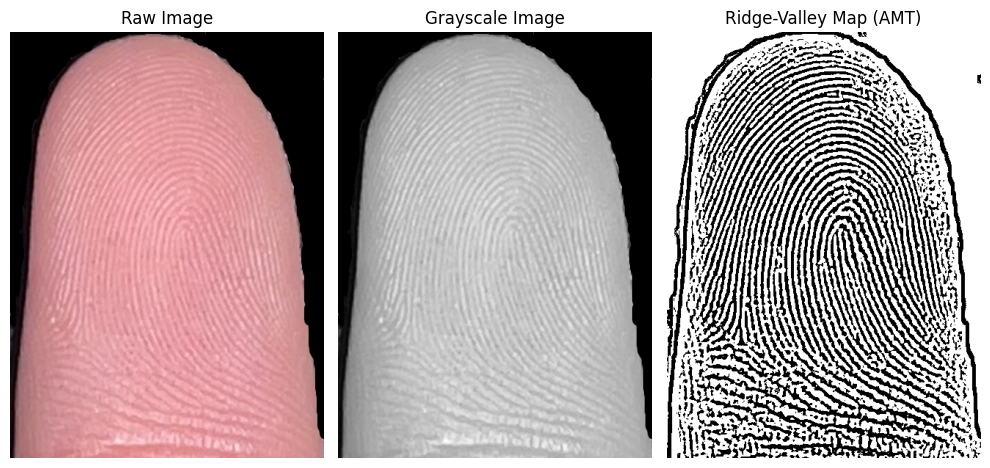

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input fingerprint image
image_path = "/content/drive/MyDrive/test/IMG_0737_test1.jpg"  # Replace with the path to your fingerprint image
raw_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Mean Thresholding
amt_image = cv2.adaptiveThreshold(
    gray_image,  # Input grayscale image
    255,         # Maximum value to use with THRESH_BINARY
    cv2.ADAPTIVE_THRESH_MEAN_C,  # Adaptive mean thresholding
    cv2.THRESH_BINARY,  # Binary thresholding
    11,          # Block size (size of the neighborhood used to calculate the threshold)
    2            # Constant subtracted from the mean
)

# Save the Ridge-Valley Map image
output_path = "/content/ridge_valley_map.png"  # Replace with your desired output path
cv2.imwrite(output_path, amt_image)
print(f"Ridge-Valley Map saved at: {output_path}")

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Raw Image")
plt.imshow(cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for matplotlib
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Ridge-Valley Map (AMT)")
plt.imshow(amt_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Found 16 images: ['p3_L_index1.JPG', 'p3_L_middle1.JPG', 'p3_L_ring1.JPG', 'p3_L_little1.JPG', 'p3_L_index2.JPG', 'p3_L_middle2.JPG', 'p3_L_ring2.JPG', 'p3_L_little2.JPG', 'p3_L_index3.JPG', 'p3_L_middle3.JPG', 'p3_L_ring3.JPG', 'p3_L_little3.JPG', 'p3_L_index4.JPG', 'p3_L_middle4.JPG', 'p3_L_ring4.JPG', 'p3_L_little4.JPG']
✅ Saved successfully: /content/drive/MyDrive/Fingerprint_palmprint_fusion/new/p3/left_fingers_output/ridge_valley_p3_L_index1.JPG
✅ Saved successfully: /content/drive/MyDrive/Fingerprint_palmprint_fusion/new/p3/left_fingers_output/ridge_valley_p3_L_middle1.JPG
✅ Saved successfully: /content/drive/MyDrive/Fingerprint_palmprint_fusion/new/p3/left_fingers_output/ridge_valley_p3_L_ring1.JPG
✅ Saved successfully: /content/drive/MyDrive/Fingerprint_palmprint_fusion/new/p3/left_fingers_output/ridge_valley_p3_L_little1.JPG
✅ Saved successfully: 

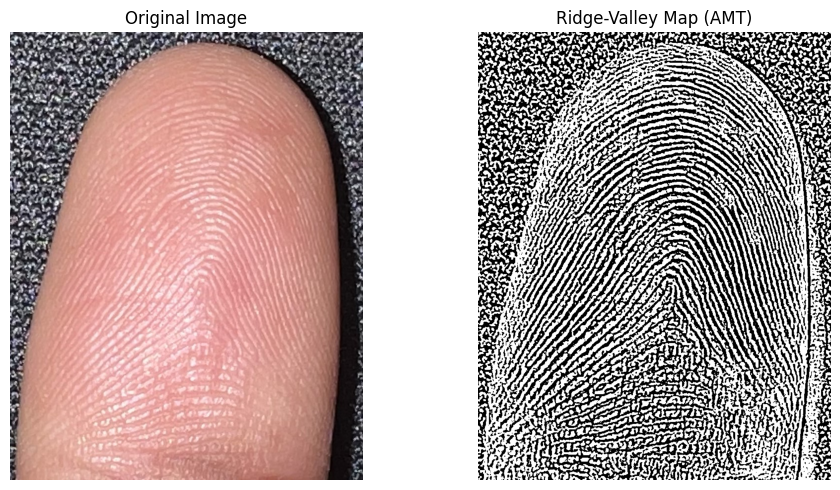

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define input and output directories
input_folder = "/content/drive/MyDrive/Fingerprint palmprint fusion/new/p3/left_fingers"
output_folder = "/content/drive/MyDrive/Fingerprint_palmprint_fusion/new/p3/left_fingers_output"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get list of all images in the input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.JPG', '.jpeg'))]

# Check if images were found
if not image_files:
    print(f"❌ No images found in '{input_folder}'. Please check the folder path and file extensions.")
    exit()

print(f"🔍 Found {len(image_files)} images: {image_files}")

# Process each image
for image_file in image_files:
    image_path = os.path.join(input_folder, image_file)

    # Load the image
    raw_image = cv2.imread(image_path)
    if raw_image is None:
        print(f"⚠️ Skipping (cannot load): {image_file}")
        continue

    # Convert to grayscale
    gray_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

    # Apply Adaptive Mean Thresholding
    amt_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Construct output path
    output_path = os.path.join(output_folder, f"ridge_valley_{image_file}")

    # Save the processed image with error handling
    success = cv2.imwrite(output_path, amt_image)
    if success:
        print(f"✅ Saved successfully: {output_path}")
    else:
        print(f"❌ Error saving: {output_path}")

# Optional: Display one sample result
sample_image_path = os.path.join(output_folder, f"ridge_valley_{image_files[0]}")
if os.path.exists(sample_image_path):
    sample_amt_image = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(input_folder, image_files[0])), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ridge-Valley Map (AMT)")
    plt.imshow(sample_amt_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("❌ Sample output image not found in the output folder.")
